In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from first_orchard_solver.gameplay.gamelogic import FruitInventory, OrchardDie
from first_orchard_solver.gameplay.gamestrategy import play_with_strat


In [2]:
OrchardDie().roll()

5

In [3]:
#Test of decrement fruit and OrchardDie
o_die = OrchardDie()
apple = FruitInventory(o_die)
apple.decrement_fruit(3)
apple.full_inv

{3: 3, 4: 4, 5: 4, 6: 4}

In [4]:
#Test of smallest strat
apple = FruitInventory(o_die)
apple.full_inv[4] = 3
print(apple.full_inv)
apple.smallest_strat()
print(apple.full_inv)

{3: 4, 4: 3, 5: 4, 6: 4}
{3: 4, 4: 2, 5: 4, 6: 4}


In [5]:
#Test of largest strat
apple = FruitInventory(o_die)
apple.full_inv[4] = 5
print(apple.full_inv)
apple.largest_strat()
print(apple.full_inv)

{3: 4, 4: 5, 5: 4, 6: 4}
{3: 4, 4: 4, 5: 4, 6: 4}


In [9]:
#Test of random strat
o_die = OrchardDie()
apple = FruitInventory(o_die)
print(apple.full_inv)
apple.random_strat()
print(apple.full_inv)

{3: 4, 4: 4, 5: 4, 6: 4}
{3: 3, 4: 4, 5: 4, 6: 4}


In [10]:
#Test check zeros
apple = FruitInventory(fruit_amt = 0)
apple.full_inv[5] = 1
print(apple.full_inv)
print(apple.check_not_zero())
banana = FruitInventory()
print(banana.full_inv)
print(banana.check_not_zero())
strawberry = FruitInventory(fruit_amt = 0)
print(strawberry.full_inv)
print(strawberry.check_not_zero())

{3: 0, 4: 0, 5: 1, 6: 0}
True
{3: 4, 4: 4, 5: 4, 6: 4}
True
{3: 0, 4: 0, 5: 0, 6: 0}
False


In [ ]:
#code to play game based on strategy including end conditions


In [13]:
#Simple test of play_with_strat function

In [14]:
final_fruit_inventory = play_with_strat('smallest')
print(final_fruit_inventory.fruit_inventory.full_inv)
print(final_fruit_inventory.raven_track.spaces)

{3: 0, 4: 0, 5: 0, 6: 0}
2


In [15]:
#class to store multiple results, i.e. raven_end is the loss condition and fruit_end is the win condition
class GameResults:
    raven_end = 0
    fruit_end = 0

In [16]:
#test to ensure GameResults is able to be updated
game_results = GameResults
print(game_results.raven_end)
game_results.raven_end +=1
print(game_results.raven_end)

0
1


In [17]:
#code to run strategy multiple times
def run_strat_ntimes(n_runs: int, strat):
    game_results = GameResults
    game_results.raven_end = 0
    game_results.fruit_end = 0
    for i in range(n_runs):
        game_state = play_with_strat(strat)
        if game_state.raven_track.spaces == 0:
            game_results.raven_end += 1
        else:
            game_results.fruit_end +=1
    return game_results    

In [18]:
#simple test of running the strategy multiple times
game_res_test = run_strat_ntimes(10, 'random')
game_res_test.raven_end

2

In [19]:
#First look at how the different strategies perform


In [20]:
smallest_results = run_strat_ntimes(100, 'smallest')
smallest_results.fruit_end

51

In [21]:
#Largest is better than smallest, likely then it is the best strategy, but let's try random to be sure

In [22]:
largest_results = run_strat_ntimes(100, 'largest')
largest_results.fruit_end

58

In [23]:
random_results = run_strat_ntimes(100, 'random')
random_results.fruit_end

64

In [24]:
#Class to keep track of the results of multiple runs per strategy
class MultIterGame:
    smallest_results = []
    largest_results = []
    random_results = []

In [25]:
#Code to run several batches of multiple runs
def run_batches(n_runs, n_times):
    mult_iter_game = MultIterGame()
    mult_iter_game.smallest_results.clear()
    mult_iter_game.largest_results.clear()
    mult_iter_game.random_results.clear()
    for _ in range(n_runs):
        small_run = run_strat_ntimes(n_times, 'smallest')
        mult_iter_game.smallest_results.append(small_run.fruit_end)
        large_run = run_strat_ntimes(n_times, 'largest')
        mult_iter_game.largest_results.append(large_run.fruit_end)
        random_run = run_strat_ntimes(n_times, 'random')
        mult_iter_game.random_results.append(random_run.fruit_end)
    return mult_iter_game

In [26]:
test_run_batches = run_batches(10,10)
print(test_run_batches.smallest_results)
print(test_run_batches.largest_results)
print(test_run_batches.random_results)

[5, 5, 6, 6, 7, 5, 6, 5, 2, 6]
[6, 5, 6, 5, 6, 9, 9, 4, 7, 7]
[5, 5, 4, 3, 5, 6, 6, 7, 9, 5]


In [27]:
real_run_batches = run_batches(10000, 10)

In [28]:
small_avg = np.mean(real_run_batches.smallest_results)

In [29]:
small_perc_win = round(small_avg/10*100,2)

In [30]:
small_perc_win

55.65

In [31]:
large_avg = np.mean(real_run_batches.largest_results)

In [32]:
large_perc_win = round(large_avg/10*100,2)

In [33]:
large_perc_win

63.21

In [34]:
#Odds increase of largest strategy over smallest strategy
round(large_perc_win - small_perc_win,2)

7.56

In [35]:
random_avg = np.mean(real_run_batches.random_results)

In [36]:
rand_perc_win = round(random_avg/10*100,2)

In [37]:
rand_perc_win

59.74

In [38]:
#Odds increase of largest strategy over random strategy
round(large_perc_win - rand_perc_win,2)

3.47

# The largest strategy is the best by ~7.5% over the smallest strategy and ~3.5 over random (which is how my 3 year old plays).* There is no theoretical reason to consider other strategies, e.g. choosing the 2nd most or 2nd least and etc.... The odds of winning range between ~ 55.5% and ~63%*

### * This was based on multiple runs of this notebook. 

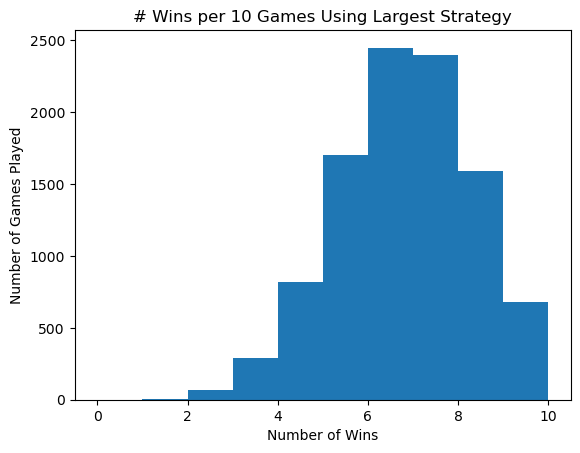

In [39]:
plt.hist(real_run_batches.largest_results)
plt.xlabel("Number of Wins")
plt.ylabel("Number of Games Played")
plt.title("# Wins per 10 Games Using Largest Strategy")
plt.show()

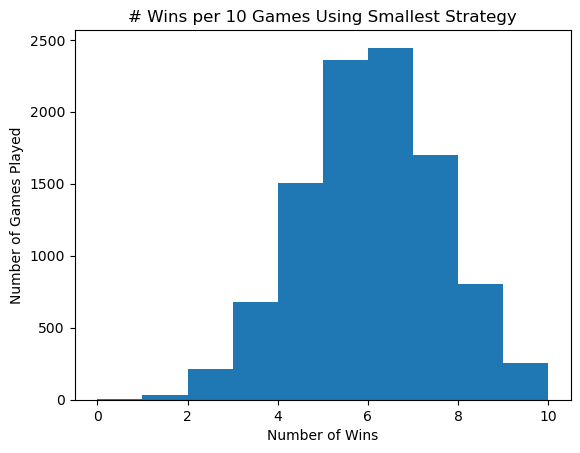

In [40]:
plt.hist(real_run_batches.smallest_results)
plt.xlabel("Number of Wins")
plt.ylabel("Number of Games Played")
plt.title("# Wins per 10 Games Using Smallest Strategy")
plt.show()

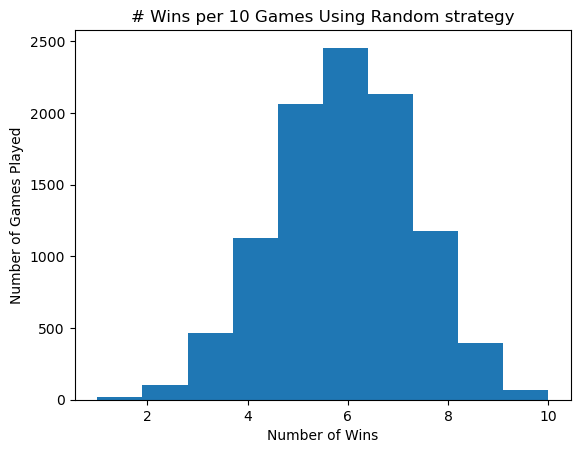

In [41]:
plt.hist(real_run_batches.random_results)
plt.xlabel("Number of Wins")
plt.ylabel("Number of Games Played")
plt.title("# Wins per 10 Games Using Random strategy")
plt.show()